## Accessing ocean colour datasets for RACE contest

This notebook demonstrates how to open and plot some ocean colour datasets for various seas from public object storage using the xcube S3 store.

See the [xcube documentation](https://xcube.readthedocs.io/en/latest/installation.html) for details of how to install the xcube conda environment for this notebook. Additionally, you will need to install the `nc-time-axis` package:

`conda install -c conda-forge nc-time-axis`

 Import some necessary libraries and configure a reasonable default figure size.

In [1]:
import s3fs
import xarray as xr
import matplotlib.pyplot as plt
import numpy as np
import xcube.core.store
from xcube.core.dsio import open_cube
import nc_time_axis
plt.rcParams["figure.figsize"] = 14,8

Create an xcube S3 store for the public bucket `cop-services`.

In [2]:
xcube_store = xcube.core.store.new_data_store("s3", anon=True, bucket_name="cop-services")

Show a list of the available dataset IDs. We will make use of these IDs below when opening and plotting data from the datasets.

In [3]:
dataset_id_list = list(xcube_store.get_data_ids())
dataset_id_list

['LWQ-NRT-300m-2019a.zarr',
 'OCEANCOLOUR_ATL_CHL_L4_NRT_OBSERVATIONS_009_037.zarr',
 'OCEANCOLOUR_BAL_CHL_L3_NRT_OBSERVATIONS_009_049.zarr',
 'OCEANCOLOUR_BS_CHL_L4_NRT_OBSERVATIONS_009_045.zarr',
 'OCEANCOLOUR_MED_CHL_L4_NRT_OBSERVATIONS_009_041.zarr',
 'OCEANCOLOUR_MED_OPTICS_L3_NRT_OBSERVATIONS_009_038.zarr']

### Black Sea

Open the Black Sea dataset.

In [4]:
black_sea = xcube_store.open_data("OCEANCOLOUR_BS_CHL_L4_NRT_OBSERVATIONS_009_045.zarr")

Make a longitude-latitude plot of the `CHL` variable (chlorophyll-a concentration) at the first available time-point.

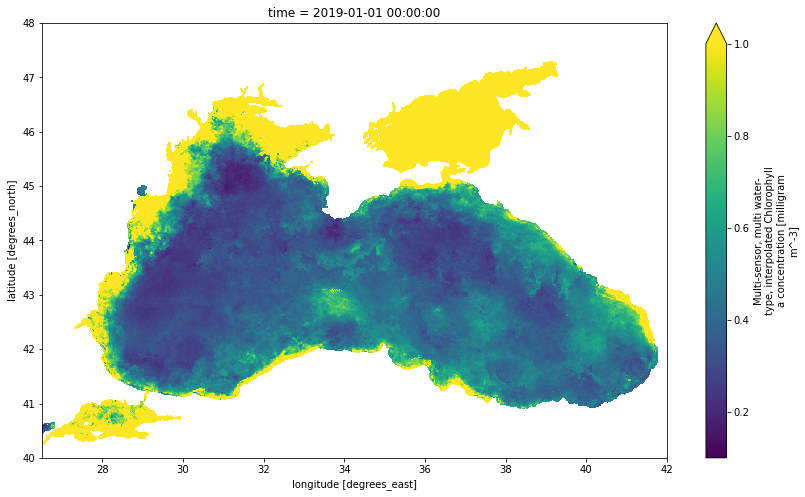

In [5]:
black_sea.CHL.isel(time=0).plot(vmax=1.)

Optional: Save cube locally to speed-up access. This may be particularly useful for recurring access or accessing many chunks, e.g. as in the time-series plot below

In [6]:
#black_sea.to_zarr("bs_local.zarr")
#black_sea = xr.open_zarr("bc_local.zarr")

In [7]:
black_sea

,Array,Chunk
Bytes,2.62 GB,3.49 MB
Shape,"(752, 790, 1101)","(25, 158, 221)"
Count,776 Tasks,775 Chunks
Type,float32,numpy.ndarray


Plot a time-series of chlorophyll-a concentration for a single geographical point south of the Crimean peninsula. Because of the coarse geographical chunking of the dataset, this may take a while.

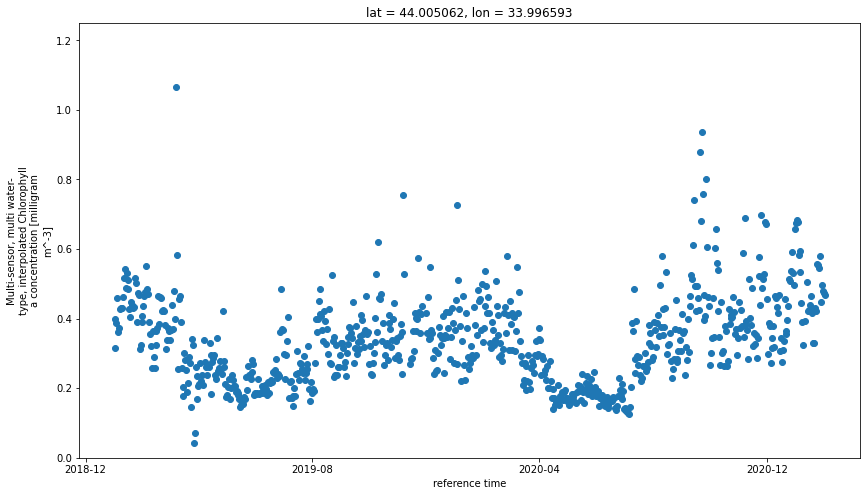

In [8]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.set_ylim(ymin=0., ymax=1.25)
black_sea.CHL.sel(lat=44.0, lon=34.0, method="nearest").plot(ax=ax, marker ='o', linestyle='')

### Mediterranean Sea

Open the Mediterranean dataset.

In [9]:
med_sea = xcube_store.open_data("OCEANCOLOUR_MED_CHL_L4_NRT_OBSERVATIONS_009_041.zarr")

Plot a map of chlorophyll-a concentration at the first time-point.

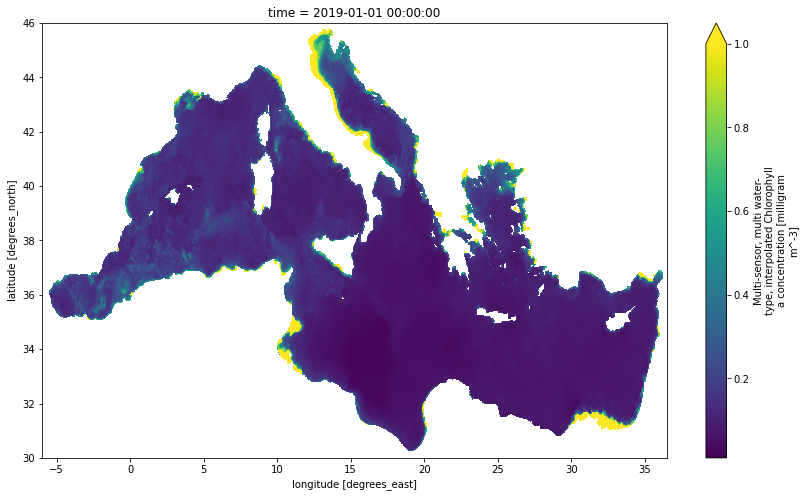

In [10]:
med_sea.CHL.isel(time=0).plot(vmax=1)

Now a time-series plot for a point between Mallorca and Sardinia.

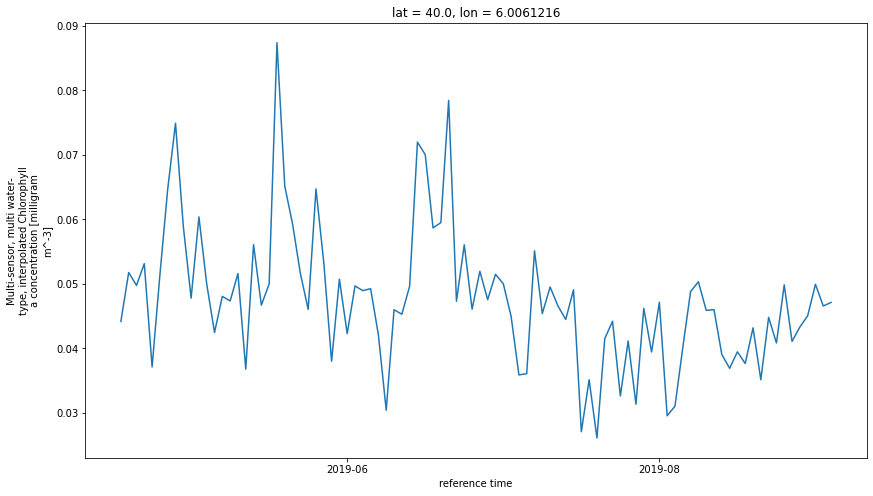

In [11]:
med_sea.CHL.sel(lat=40.,lon=6.,method='nearest').sel(time=slice('2019-06-01','2019-08-31')).plot()  # just a subset of the time-series to avoid large download

### Baltic

Open the Baltic Sea dataset using its ID.

In [12]:
baltic_sea = xcube_store.open_data("OCEANCOLOUR_BAL_CHL_L3_NRT_OBSERVATIONS_009_049.zarr")

Plot a map of chlorophyll concentration at the first available time-point.

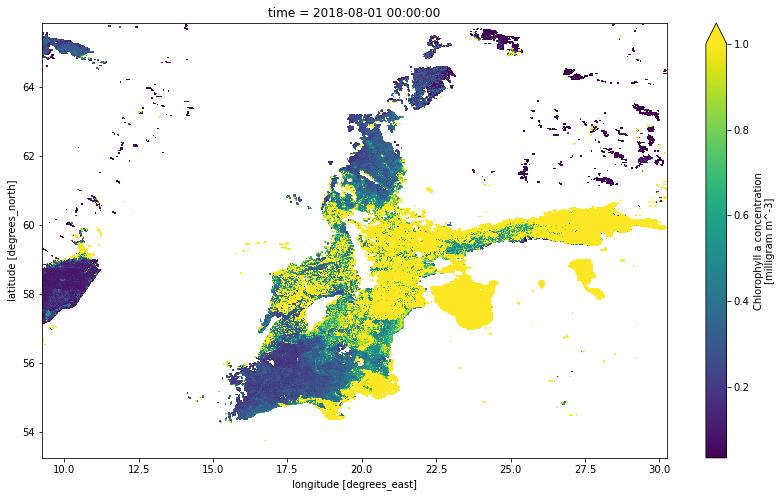

In [13]:
baltic_sea.CHL.isel(time=0).plot(vmax=1)

In [14]:
#baltic_sea.to_zarr("baltic_local.zarr")
#baltic_sea = xr.open_zarr("baltic_local.zarr")

Plot a time series for a single point in the southern Baltic.

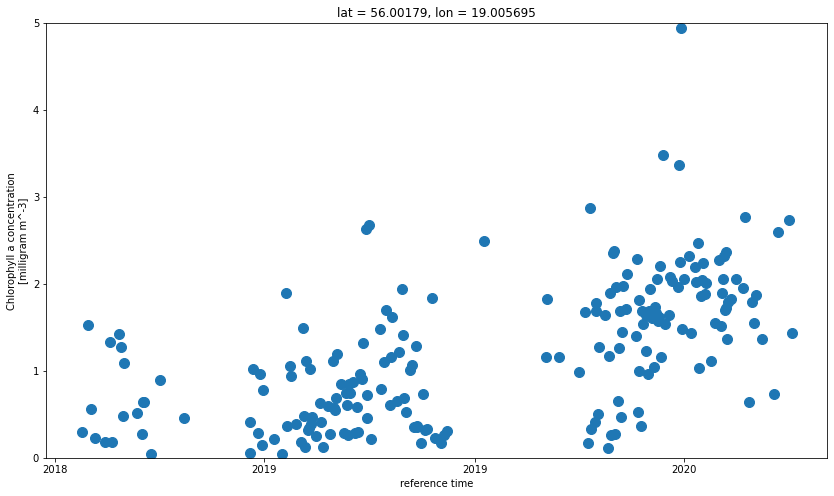

In [15]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.set_ylim(ymin=0., ymax=5.)
baltic_sea.CHL.sel(lat=56.0, lon=19.0, method="nearest").plot(ax=ax, marker="o", markersize=10, linestyle="")

### Atlantic

In [16]:
atlantic = xcube_store.open_data("OCEANCOLOUR_ATL_CHL_L4_NRT_OBSERVATIONS_009_037.zarr")

The full area of the Atlantic chlorophyll dataset is rather large, so for demonstration purposes we here plot only a geographic subset.

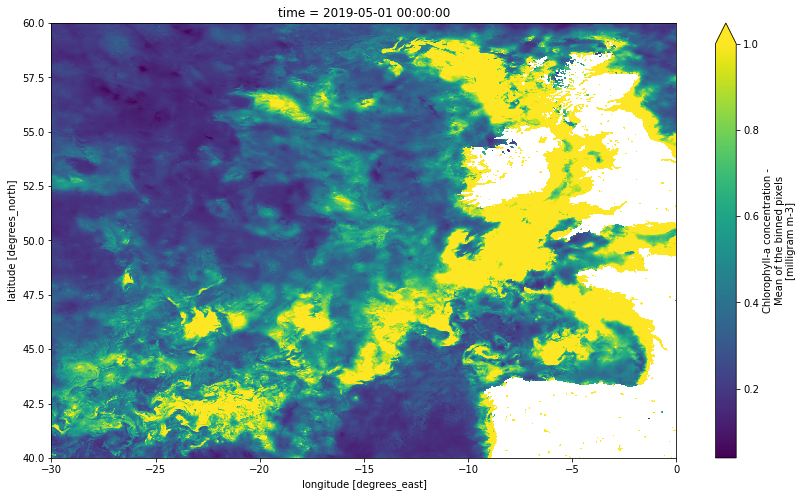

In [17]:
atlantic.CHL.sel(lon=slice(-30, 0), lat=slice(60, 40)).isel(time=0).plot(vmax=1)

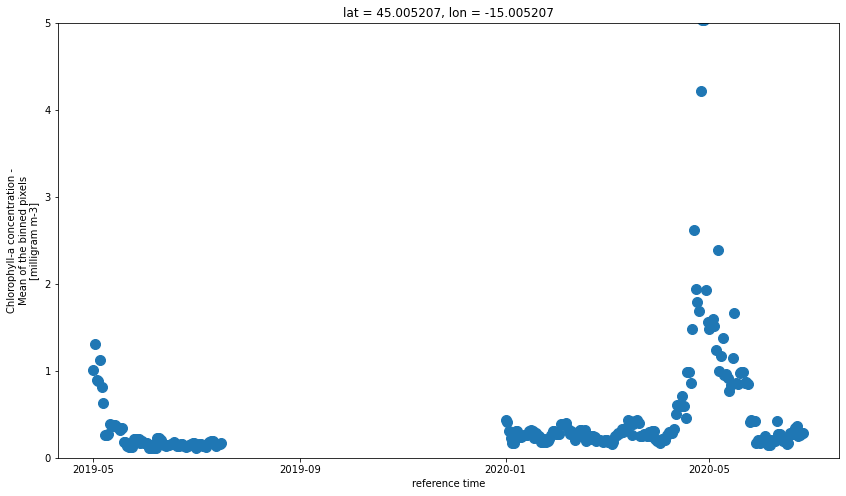

In [18]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.set_ylim(ymin=0., ymax=5.)
atlantic.CHL.sel(lat=45.0, lon=-15.0, method="nearest").plot(ax=ax, marker="o", markersize=10, linestyle="")

### Mediterranean Kd490 (Diffuse Attenuation Coefficient at 490 nm)

In [19]:
med_optics = xcube_store.open_data("OCEANCOLOUR_MED_OPTICS_L3_NRT_OBSERVATIONS_009_038.zarr")

In [20]:
med_optics

,Array,Chunk
Bytes,16.50 GB,6.53 MB
Shape,"(789, 1580, 3308)","(5, 395, 827)"
Count,2529 Tasks,2528 Chunks
Type,float32,numpy.ndarray


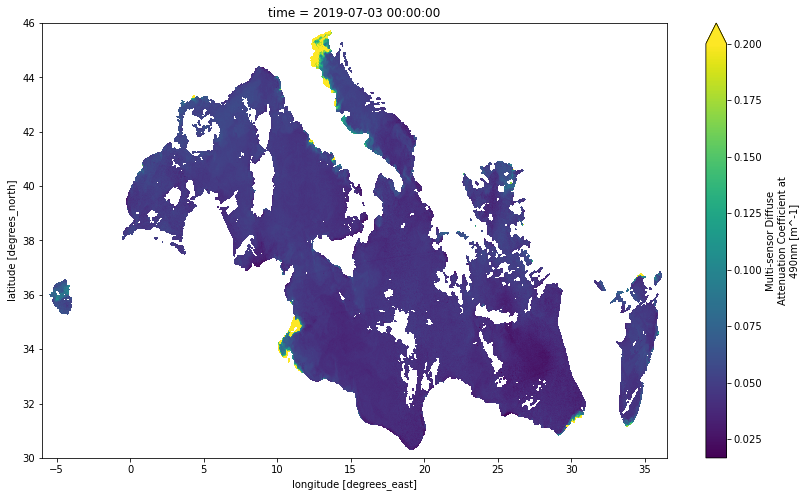

In [21]:
med_optics.KD490.sel(time="2019-07-03").plot(vmax=0.2)

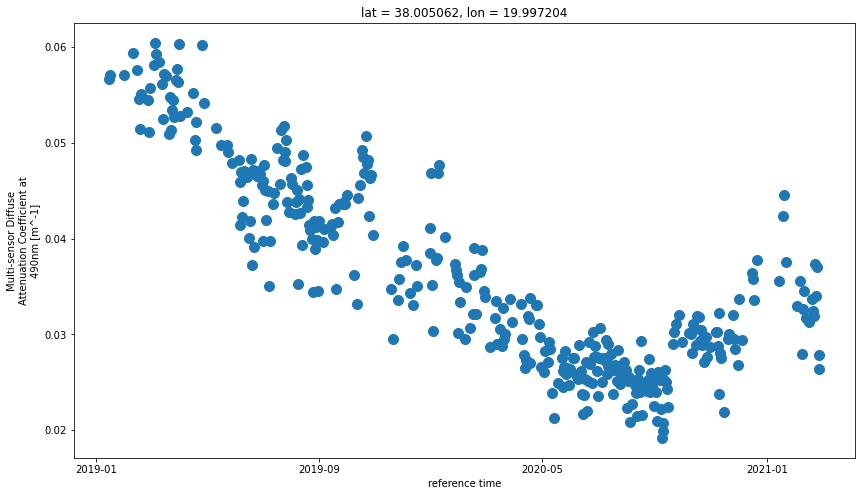

In [22]:
fig = plt.figure()
ax = fig.add_subplot(111)
# ax.set_ylim(ymin=0., ymax=0.2)
med_optics.KD490.sel(lat=38.0, lon=20.0, method="nearest").plot(ax=ax, marker="o", markersize=10, linestyle="")